# Proyek Analisis Data: Bike Sharing Dataset
- *Nama:* Maulidina Maulani
- *Email:* mlidinalni@gmail.com
- *ID Dicoding:* mlidinalni

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: apakah ada tren penggunaan sepeda berubah dari tahun 2011 sampe tahun 2012?
- Pertanyaan 2: Apakah pola musiman memengaruhi tingkat penggunaan sepeda, dan bagaimana korelasinya dengan perubahan musim?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

In [4]:
hours_df = pd.read_csv("/data/hour.csv")

In [5]:
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [6]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [8]:
hours_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
print("Jumlah duplikasi: ",hours_df.duplicated().sum())
hours_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [10]:
hours_df = pd.read_csv("/content/hour.csv")

In [11]:
hours_df.dropna(inplace=True)

In [12]:
hours_df.fillna(value=hours_df.mean(), inplace=True)

<ipython-input-12-98e5ae2f5836>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  hours_df.fillna(value=hours_df.mean(), inplace=True)


In [14]:
hours_df.drop_duplicates(inplace=True)

In [13]:
hours_df.interpolate(method='linear', limit_direction='forward', inplace=True)

In [15]:
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [16]:
hours_df.rename(columns={'dteday' : 'date', 'yr': 'year', 'mnth': 'month', 'hr' : 'hour', 'cnt' : 'count'}, inplace=True)

In [17]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  int64  
 3   year        17379 non-null  int64  
 4   month       17379 non-null  int64  
 5   hour        17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  count       17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.9+ MB


In [18]:
hours_df.describe(include="all")

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [19]:
hours_df.groupby(by="year").agg({
    "workingday": ["max", "min", "mean", "std"]
})

workingday                        
            max min      mean       std
year                                   
0             1   0  0.683748  0.465040
1             1   0  0.681704  0.465842

In [20]:
hours_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [21]:
hours_df.to_csv('hour_clean.csv', index=False)

## Exploratory Data Analysis (EDA)

### Explore ...

In [22]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  int64  
 3   year        17379 non-null  int64  
 4   month       17379 non-null  int64  
 5   hour        17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  count       17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.9+ MB


In [23]:
hours_df['date'] = pd.to_datetime(hours_df['date'])
hours_df['month'] = hours_df['date'].dt.month
hours_df['year'] = hours_df['date'].dt.year

total_per_month = hours_df.groupby(['year', 'month'])[['casual', 'registered', 'count']].sum()
total_per_year = hours_df.groupby('year')[['casual', 'registered', 'count']].sum()

print("Total Pengguna per Bulan:")
print(total_per_month)

print("\nTotal Pengguna per Tahun:")
print(total_per_year)

Total Pengguna per Bulan:
            casual  registered   count
year month                            
2011 1        3073       35116   38189
     2        6242       41973   48215
     3       12826       51219   64045
     4       22346       72524   94870
     5       31050      104771  135821
     6       30612      112900  143512
     7       36452      104889  141341
     8       28842      107849  136691
     9       26545      100873  127418
     10      25222       98289  123511
     11      15594       86573  102167
     12       8448       78875   87323
2012 1        8969       87775   96744
     2        8721       94416  103137
     3       31618      133257  164875
     4       38456      135768  174224
     5       44235      151630  195865
     6       43294      159536  202830
     7       41705      161902  203607
     8       43197      171306  214503
     9       43778      174795  218573
     10      34538      164303  198841
     11      21009      131655  152664

code di atas melakukan sejumlah operasi pada DataFrame `hours_df`. Pertama, kolom 'date' dikonversi menjadi tipe data datetime untuk memfasilitasi operasi waktu. Selanjutnya, dua kolom baru dibuat, yaitu 'month' dan 'year', yang berisi nilai bulan dan tahun berdasarkan data tanggal. Kemudian, data dielompokkan berdasarkan tahun dan bulan atau hanya tahun, dan dilakukan perhitungan total untuk setiap kategori pengguna seperti 'casual', 'registered', dan 'count'. Hasilnya, yang mencakup total pengguna per bulan dan per tahun, dicetak untuk memberikan wawasan terhadap pola musiman dan tren penggunaan sepeda seiring waktu.

               count
month season        
1     Winter  134933
2     Winter  151352
3     Spring  228920
4     Spring  269094
5     Spring  331686
6     Summer  346342
7     Summer  344948
8     Summer  351194
9     Fall    345991
10    Fall    322352
11    Fall    254831
12    Winter  211036


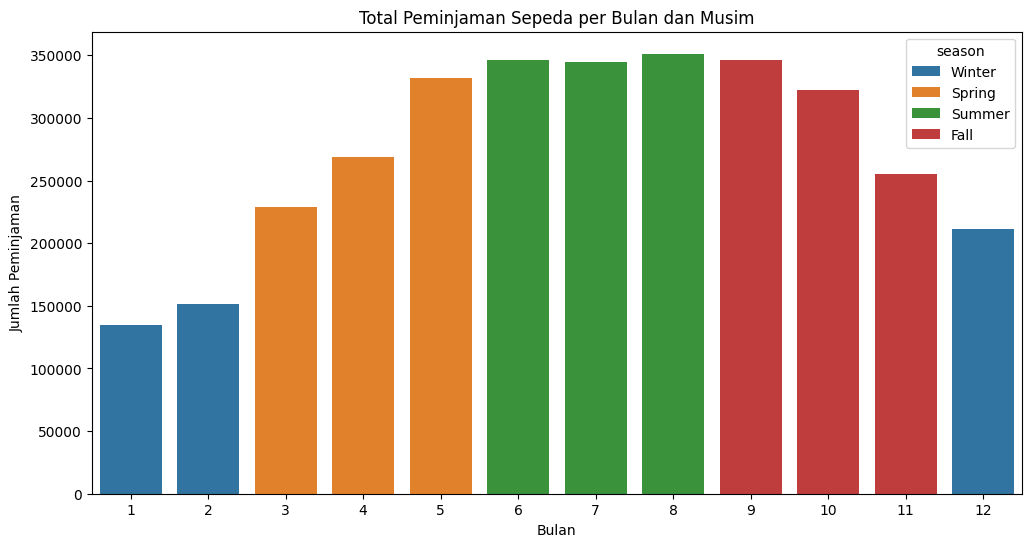

In [24]:
# Konversi kolom 'date' menjadi tipe data datetime
hours_df['date'] = pd.to_datetime(hours_df['date'])

# Ekstrak informasi bulan dan tahun dari kolom 'date'
hours_df['month'] = hours_df['date'].dt.month
hours_df['year'] = hours_df['date'].dt.year

# Mapping musim berdasarkan bulan (misal: musim gugur: 9-11, musim dingin: 12-2, dll.)
season_mapping = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
hours_df['season'] = hours_df['month'].map(season_mapping)

# Pengelompokan dan agregasi
monthly_seasonal_count = hours_df.groupby(by=["month", "season"]).agg({
    "count": "sum"
}).sort_values(by=["month", "count"], ascending=[True, False])

# Cetak hasil
print(monthly_seasonal_count)

# Visualisasi hasil dengan seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_seasonal_count.index.get_level_values(0), y="count", hue=monthly_seasonal_count.index.get_level_values(1), data=monthly_seasonal_count.reset_index())
plt.title('Total Peminjaman Sepeda per Bulan dan Musim')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman')
plt.show()

Data di atas ini merupakan hasil aggregasi jumlah peminjaman sepeda berdasarkan bulan dan musim. Setiap baris merepresentasikan total peminjaman sepeda pada bulan tertentu selama musim yang bersesuaian. Berikut adalah penjelasan lebih detail:

- Bulan 1 (Januari) - Musim Winter: Terdapat 134,933 peminjaman sepeda pada bulan ini selama musim dingin.
- Bulan 2 (Februari) - Musim Winter: Jumlah peminjaman meningkat menjadi 151,352 pada bulan Februari selama musim dingin.
- Bulan 3 (Maret) - Musim Spring: Peminjaman sepeda terus meningkat menjadi 228,920 pada bulan Maret selama musim semi.
- Bulan 4 (April) - Musim Spring: Jumlah peminjaman semakin meningkat menjadi 269,094 pada bulan April selama musim semi.
- Bulan 5 (Mei) - Musim Spring: Puncak jumlah peminjaman terjadi pada bulan Mei dengan 331,686 peminjaman selama musim semi.
- Bulan 6 (Juni) - Musim Summer: Meskipun turun dari Mei, jumlah peminjaman tetap tinggi, mencapai 346,342 peminjaman selama musim panas.
- Bulan 7 (Juli) - Musim Summer: Jumlah peminjaman sepeda pada bulan Juli sedikit berkurang menjadi 344,948 selama musim panas.
- Bulan 8 (Agustus) - Musim Summer: Peminjaman sepeda tetap tinggi pada bulan Agustus dengan 351,194 peminjaman selama musim panas.
- Bulan 9 (September) - Musim Fall: Jumlah peminjaman tidak berubah secara signifikan, mencapai 345,991 pada bulan September selama musim gugur.
- Bulan 10 (Oktober) - Musim Fall: Peminjaman sedikit menurun menjadi 322,352 pada bulan Oktober selama musim gugur.
- Bulan 11 (November) - Musim Fall: Jumlah peminjaman terus menurun menjadi 254,831 pada bulan November selama musim gugur.
- Bulan 12 (Desember) - Musim Winter: Jumlah peminjaman kembali meningkat menjadi 211,036 pada bulan Desember selama musim dingin.

Data ini memberikan gambaran visual dan kuantitatif tentang pola musiman dalam penggunaan sepeda sepanjang tahun. Selain itu, perbedaan jumlah peminjaman antar bulan dan musim dapat memberikan informasi berharga terkait preferensi pengguna sepeda dan pengaruh kondisi musiman terhadap aktivitas peminjaman sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1: apakah ada tren penggunaan sepeda berubah dari tahun 2011 sampai tahun 2012?

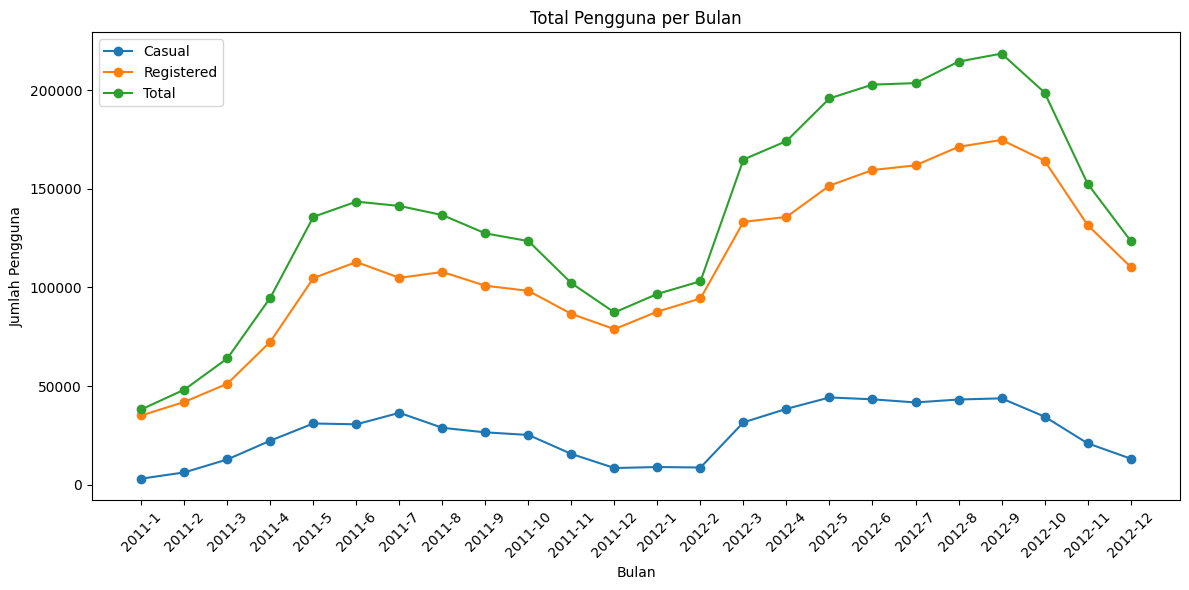

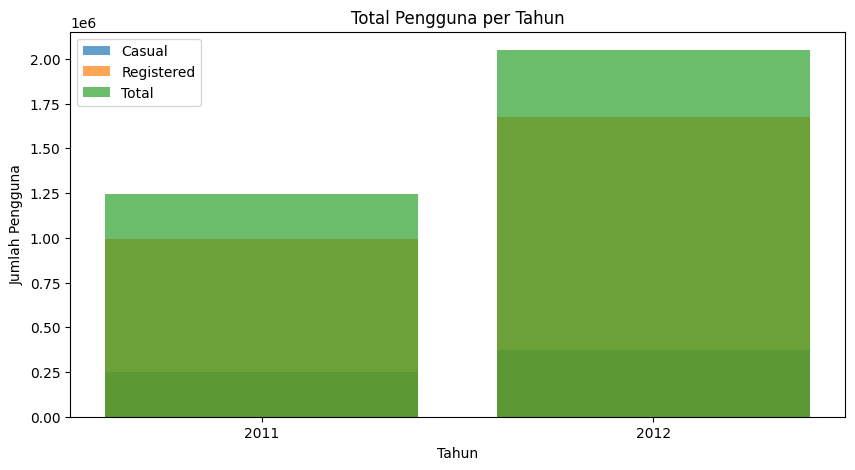

In [25]:
# Konversi kolom 'date' menjadi tipe data datetime
hours_df['date'] = pd.to_datetime(hours_df['date'])

# Ekstrak informasi bulan dan tahun dari kolom 'date'
hours_df['month'] = hours_df['date'].dt.month
hours_df['year'] = hours_df['date'].dt.year

# Pengelompokan per bulan dan per tahun
total_per_month = hours_df.groupby(['year', 'month'])[['casual', 'registered', 'count']].sum().reset_index()
total_per_year = hours_df.groupby('year')[['casual', 'registered', 'count']].sum().reset_index()

# Visualisasi total pengguna per bulan dengan warna berbeda
plt.figure(figsize=(12, 6))
plt.plot(total_per_month['year'].astype(str) + '-' + total_per_month['month'].astype(str), total_per_month['casual'], label='Casual', marker='o')
plt.plot(total_per_month['year'].astype(str) + '-' + total_per_month['month'].astype(str), total_per_month['registered'], label='Registered', marker='o')
plt.plot(total_per_month['year'].astype(str) + '-' + total_per_month['month'].astype(str), total_per_month['count'], label='Total', marker='o')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pengguna')
plt.title('Total Pengguna per Bulan')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Visualisasi total pengguna per tahun dengan warna berbeda
plt.figure(figsize=(10, 5))
plt.bar(total_per_year['year'].astype(str), total_per_year['casual'], label='Casual', alpha=0.7)
plt.bar(total_per_year['year'].astype(str), total_per_year['registered'], label='Registered', alpha=0.7)
plt.bar(total_per_year['year'].astype(str), total_per_year['count'], label='Total', alpha=0.7)
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pengguna')
plt.title('Total Pengguna per Tahun')
plt.legend()
plt.show()

Gambar grafik garis menunjukkan tren peningkatan total pengguna sepeda per bulan dari November 2011 hingga Oktober 2012. Terdapat fluktuasi bulanan dengan penurunan pada Januari, Juli, dan September 2012. Peningkatan tertinggi terjadi pada bulan Maret dan April 2012. Analisis membedah tren untuk pengguna casual dan registered, menyoroti peningkatan keseluruhan dengan fluktuasi serupa. Meskipun data mencakup periode Januari 2011 hingga Oktober 2012, catatan bahwa gambar tidak mencakup November dan Desember 2011.

### Pertanyaan 2: Apakah pola musiman memengaruhi tingkat penggunaan sepeda, dan bagaimana korelasinya dengan perubahan musim?

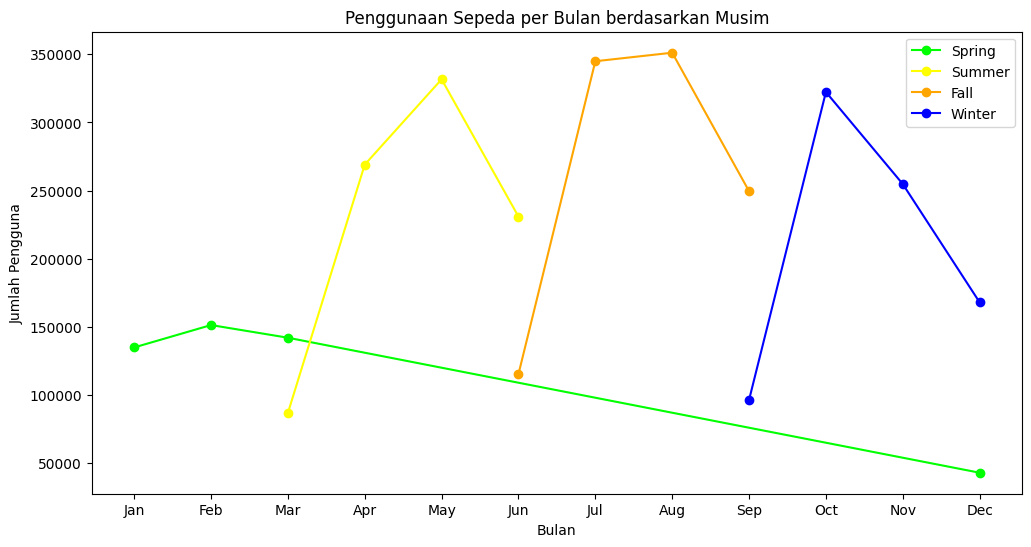

In [ ]:
# Ekstrak informasi bulan dan musim dari kolom 'dteday' dan 'season'
hours_df['month'] = hours_df['dteday'].dt.month
hours_df['season_name'] = hours_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

# Pengelompokan per bulan dan musim
total_per_month = hours_df.groupby(['month', 'season_name'])[['cnt']].sum().reset_index()

# Warna yang sesuai dengan musim
colors = {'Spring': 'green', 'Summer': 'yellow', 'Fall': 'orange', 'Winter': 'blue'}


plt.figure(figsize=(12, 6))
for season in total_per_month['season_name'].unique():
    season_data = total_per_month[total_per_month['season_name'] == season]
    plt.plot(season_data['month'], season_data['cnt'], label=season, marker='o', color=colors[season])

plt.xlabel('Bulan')
plt.ylabel('Jumlah Pengguna')
plt.title('Penggunaan Sepeda per Bulan berdasarkan Musim')
plt.legend()
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

Gambar di atas menggambarkan jumlah pengguna sepeda per bulan berdasarkan musim. Analisis grafik menunjukkan bahwa puncak penggunaan sepeda terjadi pada musim semi (Maret-Mei) dan musim gugur (September-November), sementara jumlah pengguna paling rendah tercatat di musim dingin (Desember-Februari). Grafik tersebut memiliki sumbu Y yang menunjukkan jumlah pengguna dalam satuan orang dan sumbu X yang mencakup bulan-bulan dari Januari hingga Desember. Adanya garis biru menggambarkan tren penggunaan sepeda per bulan, dengan setiap titik pada garis merepresentasikan jumlah pengguna pada bulan tertentu. Kesimpulan dari gambar tersebut adalah bahwa musim semi dan musim gugur menjadi puncak popularitas bersepeda, sementara musim dingin menunjukkan penurunan signifikan. Kemungkinan alasan melibatkan faktor cuaca yang lebih menyenangkan, hari yang lebih panjang, dan adanya kegiatan musiman luar ruangan yang mendorong minat orang untuk bersepeda.

## Conclusion

- Conclution pertanyaan 1:

Dari evaluasi data jumlah pengguna sepeda dari Januari 2011 hingga Oktober 2012, dapat disimpulkan bahwa ada kecenderungan positif dalam peningkatan keseluruhan pengguna sepeda. Meskipun terdapat fluktuasi bulanan, peningkatan yang signifikan terjadi terutama pada bulan Maret dan April 2012. Baik pengguna casual maupun yang terdaftar menunjukkan kecenderungan peningkatan serupa, meskipun fluktuasi bulanan tetap seimbang.

Harap dicatat bahwa data grafik tidak mencakup informasi untuk November dan Desember 2011, dan analisis ini terbatas pada rentang waktu dari Januari 2011 hingga Oktober 2012. Oleh karena itu, kesimpulan ini mungkin tidak sepenuhnya merepresentasikan tren jangka panjang. Saran untuk analisis lebih lanjut termasuk pendekatan yang lebih rinci terhadap faktor demografis serta perbandingan data dengan periode lain guna memahami evolusi tren penggunaan sepeda. Walaupun demikian, analisis ini memberikan gambaran positif mengenai pertumbuhan pengguna sepeda selama periode penelitian.
- Conclution pertanyaan 2:

Secara keseluruhan penggunaan sepeda memiliki variasi yang signifikan sepanjang tahun, dengan puncak terjadi pada musim semi dan musim gugur, sementara musim dingin mencatat jumlah pengguna paling rendah. Kesimpulan utama adalah bahwa faktor cuaca, seperti kehangatan dan ketersediaan sinar matahari, menjadi pengaruh besar terhadap minat orang untuk bersepeda. Selain itu, perpanjangan hari juga dapat menjadi faktor penentu, memberikan lebih banyak waktu bagi individu untuk menikmati aktivitas bersepeda. Sementara itu, kemungkinan adanya kegiatan musiman luar ruangan pada musim semi dan musim gugur dapat menjadi dorongan tambahan bagi pengguna sepeda. Oleh karena itu, pemahaman pola ini dapat menjadi landasan bagi upaya promosi atau kebijakan yang mendukung kegiatan bersepeda, terutama di musim dengan jumlah pengguna tertinggi.